# **Data extraction and Preprocessing**

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Capstone project')

In [ ]:
import pandas as pd
import numpy as np

import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

**The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)**

In [ ]:
ravdess_path=os.chdir("/content/drive/MyDrive/Capstone project/RAVDESS")

In [ ]:
ravdess_directory_list = os.listdir(ravdess_path)

file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    actor = os.listdir("/content/drive/MyDrive/Capstone project/RAVDESS/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # Third part represents the emotion associated to the file.
        file_emotion.append(int(part[2]))
        file_path.append("/content/drive/MyDrive/Capstone project/RAVDESS/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df

Emotions                                               Path
0      neutral  /content/drive/MyDrive/Capstone project/RAVDES...
1         fear  /content/drive/MyDrive/Capstone project/RAVDES...
2          sad  /content/drive/MyDrive/Capstone project/RAVDES...
3      neutral  /content/drive/MyDrive/Capstone project/RAVDES...
4        happy  /content/drive/MyDrive/Capstone project/RAVDES...
...        ...                                                ...
1435  surprise  /content/drive/MyDrive/Capstone project/RAVDES...
1436   disgust  /content/drive/MyDrive/Capstone project/RAVDES...
1437   disgust  /content/drive/MyDrive/Capstone project/RAVDES...
1438   disgust  /content/drive/MyDrive/Capstone project/RAVDES...
1439   disgust  /content/drive/MyDrive/Capstone project/RAVDES...

[1440 rows x 2 columns]

**Surrey Audio-Visual Expressed Emotion (SAVEE)**

In [ ]:
savee_path=os.chdir("/content/drive/MyDrive/Capstone project/SAVEE")

In [ ]:
savee_directory_list = os.listdir(savee_path)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append( "/content/drive/MyDrive/Capstone project/SAVEE/" + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/Capstone project/SAVEE/...
1    angry  /content/drive/MyDrive/Capstone project/SAVEE/...
2    angry  /content/drive/MyDrive/Capstone project/SAVEE/...
3    angry  /content/drive/MyDrive/Capstone project/SAVEE/...
4    angry  /content/drive/MyDrive/Capstone project/SAVEE/...

**Toronto emotional speech set (TESS)**

In [ ]:
tess_path=os.chdir("/content/drive/MyDrive/Capstone project/TESS")

In [ ]:
tess_directory_list = os.listdir(tess_path)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir("/content/drive/MyDrive/Capstone project/TESS/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append("/content/drive/MyDrive/Capstone project/TESS/"  + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/Capstone project/TESS/Y...
1    angry  /content/drive/MyDrive/Capstone project/TESS/Y...
2    angry  /content/drive/MyDrive/Capstone project/TESS/Y...
3    angry  /content/drive/MyDrive/Capstone project/TESS/Y...
4    angry  /content/drive/MyDrive/Capstone project/TESS/Y...

In [ ]:
os.chdir('/content/drive/MyDrive/Capstone project')

In [ ]:
combined_data = pd.concat([Ravdess_df, Savee_df,Tess_df], axis = 0)
combined_data.to_csv("combined_data.csv",index=False)
combined_data.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/Capstone project/RAVDES...
1     fear  /content/drive/MyDrive/Capstone project/RAVDES...
2      sad  /content/drive/MyDrive/Capstone project/RAVDES...
3  neutral  /content/drive/MyDrive/Capstone project/RAVDES...
4    happy  /content/drive/MyDrive/Capstone project/RAVDES...

In [ ]:
len(combined_data)

4720

# **Data Analysis**

In [ ]:
combined_data=pd.read_csv("combined_data.csv") # contains RADVESS, SAVEE and TESS dataset, 4720 audio samples in total

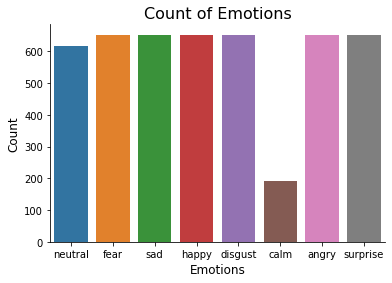

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=combined_data.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

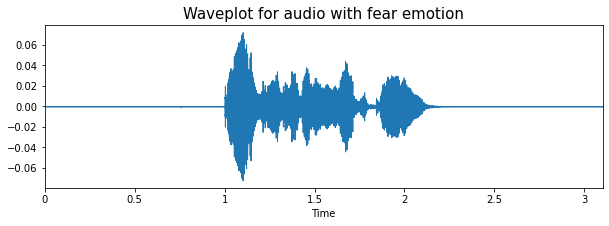

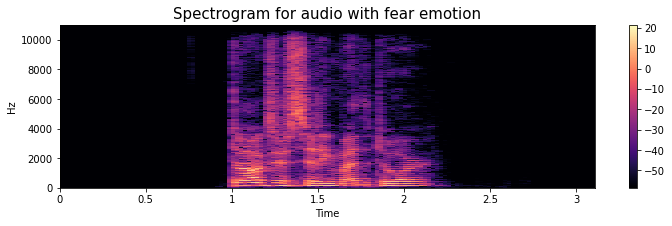

In [ ]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

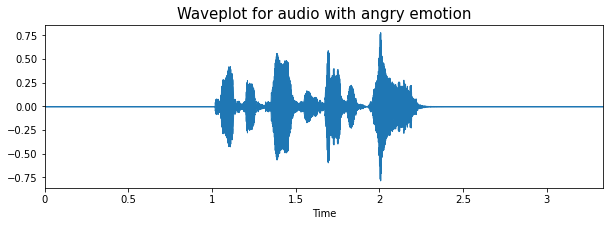

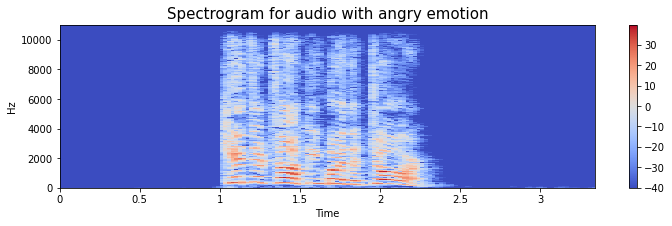

In [ ]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

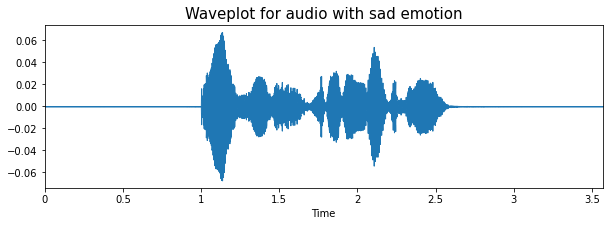

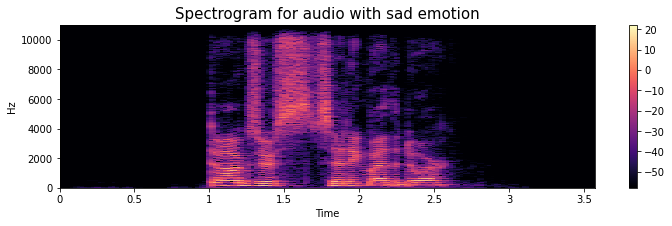

In [ ]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

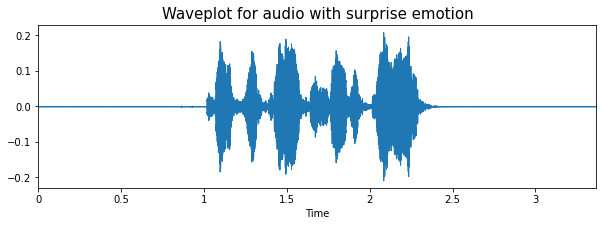

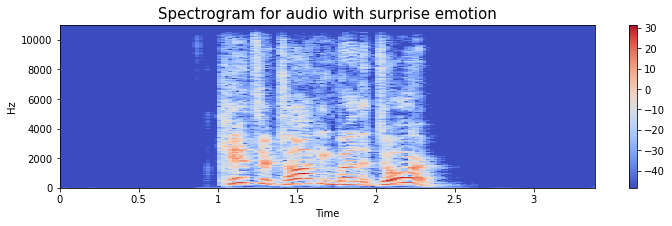

In [ ]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
combined_data

Emotions                                               Path
0     neutral  /content/drive/MyDrive/Capstone project/RAVDES...
1        fear  /content/drive/MyDrive/Capstone project/RAVDES...
2         sad  /content/drive/MyDrive/Capstone project/RAVDES...
3     neutral  /content/drive/MyDrive/Capstone project/RAVDES...
4       happy  /content/drive/MyDrive/Capstone project/RAVDES...
...       ...                                                ...
4715    angry  /content/drive/MyDrive/Capstone project/TESS/O...
4716    angry  /content/drive/MyDrive/Capstone project/TESS/O...
4717    angry  /content/drive/MyDrive/Capstone project/TESS/O...
4718    angry  /content/drive/MyDrive/Capstone project/TESS/O...
4719    angry  /content/drive/MyDrive/Capstone project/TESS/O...

[4720 rows x 2 columns]

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

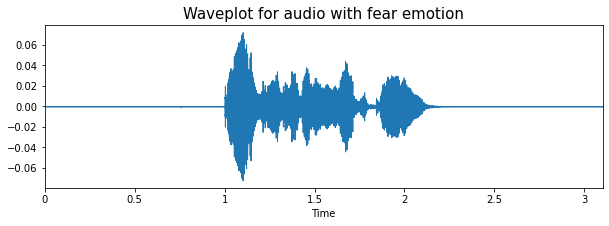

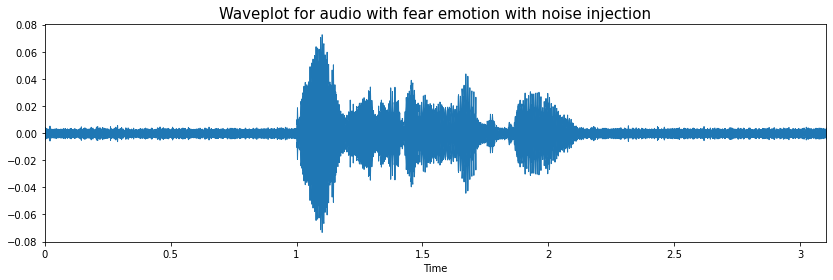

In [ ]:
emotion='fear'
path = np.array(combined_data.Path[combined_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
x = noise(data)
plt.figure(figsize=(14,4))
plt.title('Waveplot for audio with {} emotion with noise injection'.format(emotion), size=15)
librosa.display.waveplot(y=x, sr=sampling_rate)
Audio(x, rate=sampling_rate)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def extract_features(data,sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

  # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    #spectral centroid
    spec_cent=np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, spec_cent)) # stacking horizontally

    #spectral flux
    onset_env =np.mean( librosa.onset.onset_strength(sr=sample_rate, S=librosa.amplitude_to_db(data, ref=np.max)))
    result=np.hstack((result,onset_env))

    #chroma_cens
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=data, sr=sample_rate))
    result=np.hstack((result,chroma_cens))

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res_no_augmentation = extract_features(data,sample_rate)
    result = np.array(res_no_augmentation)

    # with noise
    noise_data = noise(data)
    res_noise = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res_noise))

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(combined_data.Path, combined_data.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=917
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=947
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=867
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=753
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=245
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWar

In [ ]:
len(X), len(Y), combined_data.Path.shape

(9440, 9440, (4720,))

In [ ]:
os.chdir('/content/drive/MyDrive/Capstone project')

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)

In [ ]:
Features.shape

(9440, 166)

In [ ]:
Features=pd.read_csv("features.csv")

In [ ]:
Features.labels.replace({ 'calm':'neutral', 'happy':'positive', 'sad':'negative', 'angry':'negative', 'fear':'negative', 'disgust':'negative', 'surprise':'positive'}, inplace=True)

In [ ]:
Features

0         1         2         3         4         5         6  \
0     0.210033  0.570057  0.586584  0.653195  0.683537  0.689481  0.635271   
1     0.248639  0.635577  0.689296  0.743567  0.780679  0.780504  0.698883   
2     0.272909  0.669703  0.718205  0.773636  0.786736  0.705162  0.647791   
3     0.292300  0.734421  0.782632  0.838931  0.816924  0.790371  0.706151   
4     0.202275  0.532338  0.586200  0.588144  0.682158  0.656602  0.736176   
...        ...       ...       ...       ...       ...       ...       ...   
9435  0.128263  0.600622  0.681199  0.577420  0.525139  0.479941  0.558861   
9436  0.060376  0.625123  0.344633  0.314756  0.382145  0.380697  0.317979   
9437  0.158704  0.657454  0.466522  0.484615  0.541281  0.518304  0.408584   
9438  0.073206  0.614919  0.593109  0.500528  0.463633  0.492379  0.536509   
9439  0.158850  0.707381  0.649582  0.571519  0.574382  0.616399  0.551299   

             7         8         9  ...       156       157       158  \
0     0.584093  0.535988  0.551880  ...  0.000562  0.000474  0.000265   
1     0.604042  0.585827  0.606369  ...  0.000612  0.000512  0.000305   
2     0.630654  0.649591  0.651302  ...  0.000219  0.000114  0.000045   
3     0.680205  0.700754  0.693163  ...  0.000298  0.000192  0.000134   
4     0.701344  0.629964  0.570898  ...  0.000483  0.000558  0.000667   
...        ...       ...       ...  ...       ...       ...       ...   
9435  0.427548  0.430974  0.512639  ...  0.001133  0.001437  0.001342   
9436  0.314461  0.353336  0.306896  ...  0.000165  0.000103  0.000034   
9437  0.385649  0.417199  0.399736  ...  0.000982  0.000870  0.000862   
9438  0.357219  0.332937  0.395757  ...  0.000086  0.000082  0.000057   
9439  0.407754  0.440416  0.473992  ...  0.000284  0.000270  0.000260   

           159       160           161          162       163       164  \
0     0.000061  0.000007  6.526071e-08  2473.644049  1.614772  0.238098   
1     0.000102  0.000049  4.488326e-05  3659.481191  3.313961  0.246833   
2     0.000026  0.000007  1.413614e-07  2851.090456  1.671982  0.258256   
3     0.000118  0.000096  9.436708e-05  4022.532551  3.713938  0.263885   
4     0.000270  0.000030  6.663075e-07  2795.779412  1.855390  0.230151   
...        ...       ...           ...          ...       ...       ...   
9435  0.001034  0.000906  9.553879e-04  3541.937552  2.969693  0.256909   
9436  0.000013  0.000002  1.807194e-06  1501.950420  1.509595  0.244760   
9437  0.000891  0.000832  7.826394e-04  3552.268041  2.946720  0.245374   
9438  0.000019  0.000001  4.940924e-08  1959.145959  1.806949  0.241051   
9439  0.000221  0.000223  2.189912e-04  3436.703638  3.027116  0.248520   

        labels  
0      neutral  
1      neutral  
2     negative  
3     negative  
4     negative  
...        ...  
9435  negative  
9436  negative  
9437  negative  
9438  negative  
9439  negative  

[9440 rows x 166 columns]

#**Principal Component Analysis (PCA)**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
Features=pd.read_csv("features.csv")

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
np.mean(X),np.std(X)

(4.08735420673504e-18, 0.9999999999999996)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]

In [ ]:
normalised_X = pd.DataFrame(X,columns=feat_cols)

In [ ]:
normalised_X

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0     0.717070  0.235887  0.272021  0.751161  1.035848  1.101173  0.728048   
1     1.152214  0.706884  1.020015  1.370065  1.681393  1.725965  1.239820   
2     1.425765  0.952209  1.230536  1.575992  1.721646  1.208813  0.828776   
3     1.644331  1.417442  1.699718  2.023165  1.922256  1.793693  1.298288   
4     0.629623 -0.035255  0.269224  0.305665  1.026681  0.875489  1.539846   
...        ...       ...       ...       ...       ...       ...       ...   
9435 -0.204598  0.455610  0.961045  0.232217 -0.016769 -0.337133  0.113322   
9436 -0.969784  0.631739 -1.489963 -1.566622 -0.967021 -1.018362 -1.824608   
9437  0.138511  0.864154 -0.602315 -0.403349  0.090502 -0.073806 -1.095675   
9438 -0.825176  0.558385  0.319541 -0.294374 -0.425503 -0.251762 -0.066501   
9439  0.140162  1.223061  0.730797  0.191805  0.310466  0.599532  0.052486   

      feature7  feature8  feature9  ...  feature155  feature156  feature157  \
0     0.203534 -0.118818  0.099050  ...   -0.292612   -0.249525   -0.252922   
1     0.356861  0.250404  0.514957  ...   -0.287303   -0.243557   -0.248192   
2     0.561403  0.722780  0.857928  ...   -0.290340   -0.290552   -0.297259   
3     0.942259  1.101806  1.177449  ...   -0.281625   -0.281096   -0.287584   
4     1.104731  0.577380  0.244213  ...   -0.281262   -0.258900   -0.242490   
...        ...       ...       ...  ...         ...         ...         ...   
9435 -0.999676 -0.896782 -0.200474  ...   -0.194167   -0.181219   -0.134155   
9436 -1.868874 -1.471937 -1.770882  ...   -0.302866   -0.296907   -0.298588   
9437 -1.321715 -0.998830 -1.062248  ...   -0.209943   -0.199245   -0.204021   
9438 -1.540233 -1.623065 -1.092622  ...   -0.307549   -0.306356   -0.301217   
9439 -1.151818 -0.826837 -0.495457  ...   -0.287167   -0.282725   -0.277994   

      feature158  feature159  feature160  feature161  feature162  feature163  \
0      -0.251117   -0.238611   -0.226684   -0.225021   -0.244637   -0.780459   
1      -0.245837   -0.232747   -0.220612   -0.218595    0.932125    1.103762   
2      -0.280027   -0.243452   -0.226601   -0.225010    0.129921   -0.717019   
3      -0.268289   -0.230447   -0.213847   -0.211501    1.292398    1.547293   
4      -0.198302   -0.209073   -0.223372   -0.224934    0.075033   -0.513639   
...          ...         ...         ...         ...         ...         ...   
9435   -0.109554   -0.101125   -0.097987   -0.088060    0.815481    0.722005   
9436   -0.281416   -0.245391   -0.227316   -0.224771   -1.208895   -0.897090   
9437   -0.172609   -0.121230   -0.108686   -0.112826    0.825733    0.696530   
9438   -0.278422   -0.244533   -0.227468   -0.225023   -0.755198   -0.567355   
9439   -0.251790   -0.215985   -0.195757   -0.193634    0.711053    0.785681   

      feature164  
0      -0.230681  
1       0.088660  
2       0.506300  
3       0.712066  
4      -0.521223  
...          ...  
9435    0.457050  
9436    0.012891  
9437    0.035347  
9438   -0.122705  
9439    0.150347  

[9440 rows x 165 columns]

In [ ]:
pca_dimensions = PCA(n_components=10)
principalComponents_X = pca_dimensions.fit_transform(normalised_X)

In [ ]:
principal_dimensions_Df = pd.DataFrame(data = principalComponents_X
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10'])

In [ ]:
principal_dimensions_Df

principal component 1  principal component 2  principal component 3  \
0                 -2.733890               0.661630              -1.127197   
1                 -2.301332               2.357905              -2.336105   
2                 -2.608515               1.931166              -1.920909   
3                 -2.179305               3.518109              -3.096302   
4                 -2.781717               0.896503              -1.104843   
...                     ...                    ...                    ...   
9435              -1.588743               0.708744              -0.467530   
9436              -2.844827              -2.231262               1.897397   
9437              -2.071756               0.624970              -0.463674   
9438              -2.331022              -0.820613               0.860322   
9439              -1.944629               1.085369              -0.730584   

      principal component 4  principal component 5  principal component 6  \
0                 -1.059655               0.148259               0.194995   
1                 -2.600053              -0.692768              -0.039064   
2                 -2.133516              -0.178754              -0.299821   
3                 -3.540172              -0.854176              -0.436708   
4                 -0.605703               0.548721              -0.040740   
...                     ...                    ...                    ...   
9435              -0.614840              -0.514721               0.018692   
9436               2.087376               0.622287              -0.017661   
9437              -0.376048              -0.424168               0.066527   
9438               0.331590               0.081461              -0.332545   
9439              -1.358616              -0.638079              -0.312029   

      principal component 7  principal component 8  principal component 9  \
0                  0.905470              -1.448916               0.850422   
1                  0.431583              -0.840557               1.039842   
2                  0.941489              -0.718217               0.202846   
3                  0.485102              -0.164069               0.703553   
4                  0.957289              -1.009060               0.957860   
...                     ...                    ...                    ...   
9435              -0.692826              -0.710617               0.331437   
9436              -0.514434              -1.390881              -0.618948   
9437              -0.813559              -0.508041               0.354134   
9438              -0.439970              -0.560355              -0.473659   
9439              -0.628466              -0.147214               0.333943   

      principal component 10  
0                   0.357304  
1                   0.122131  
2                   0.253710  
3                  -0.000368  
4                   0.211369  
...                      ...  
9435               -0.033952  
9436                0.010365  
9437               -0.565530  
9438                0.243595  
9439               -0.118976  

[9440 rows x 10 columns]

In [ ]:
print('Explained variation per principal component: {}'.format(pca_dimensions.explained_variance_ratio_))

Explained variation per principal component: [0.25190755 0.0810315  0.06278632 0.05819881 0.04046419 0.02908662
 0.02580535 0.02100024 0.01732675 0.01611325]


In [ ]:
sum(pca_dimensions.explained_variance_ratio_)

0.603720574757289

In [ ]:
principal_dimensions_Df["label"]=Y

In [ ]:
principal_dimensions_Df

principal component 1  principal component 2  principal component 3  \
0                 -2.733890               0.661630              -1.127197   
1                 -2.301332               2.357905              -2.336105   
2                 -2.608515               1.931166              -1.920909   
3                 -2.179305               3.518109              -3.096302   
4                 -2.781717               0.896503              -1.104843   
...                     ...                    ...                    ...   
9435              -1.588743               0.708744              -0.467530   
9436              -2.844827              -2.231262               1.897397   
9437              -2.071756               0.624970              -0.463674   
9438              -2.331022              -0.820613               0.860322   
9439              -1.944629               1.085369              -0.730584   

      principal component 4  principal component 5  principal component 6  \
0                 -1.059655               0.148259               0.194995   
1                 -2.600053              -0.692768              -0.039064   
2                 -2.133516              -0.178754              -0.299821   
3                 -3.540172              -0.854176              -0.436708   
4                 -0.605703               0.548721              -0.040740   
...                     ...                    ...                    ...   
9435              -0.614840              -0.514721               0.018692   
9436               2.087376               0.622287              -0.017661   
9437              -0.376048              -0.424168               0.066527   
9438               0.331590               0.081461              -0.332545   
9439              -1.358616              -0.638079              -0.312029   

      principal component 7  principal component 8  principal component 9  \
0                  0.905470              -1.448916               0.850422   
1                  0.431583              -0.840557               1.039842   
2                  0.941489              -0.718217               0.202846   
3                  0.485102              -0.164069               0.703553   
4                  0.957289              -1.009060               0.957860   
...                     ...                    ...                    ...   
9435              -0.692826              -0.710617               0.331437   
9436              -0.514434              -1.390881              -0.618948   
9437              -0.813559              -0.508041               0.354134   
9438              -0.439970              -0.560355              -0.473659   
9439              -0.628466              -0.147214               0.333943   

      principal component 10    label  
0                   0.357304  neutral  
1                   0.122131  neutral  
2                   0.253710     fear  
3                  -0.000368     fear  
4                   0.211369      sad  
...                      ...      ...  
9435               -0.033952    angry  
9436                0.010365    angry  
9437               -0.565530    angry  
9438                0.243595    angry  
9439               -0.118976    angry  

[9440 rows x 11 columns]

In [ ]:
principal_dimensions_Df.label.replace({ 'calm':'neutral', 'happy':'positive', 'sad':'negative', 'angry':'negative', 'fear':'negative', 'disgust':'negative', 'surprise':'positive'}, inplace=True)

In [ ]:
principal_dimensions_Df.label.replace({ 'negative':0, 'neutral':1, 'positive':2},inplace=True)

In [ ]:
principal_dimensions_Df

principal component 1  principal component 2  principal component 3  \
0                 -2.733890               0.661630              -1.127197   
1                 -2.301332               2.357905              -2.336105   
2                 -2.608515               1.931166              -1.920909   
3                 -2.179305               3.518109              -3.096302   
4                 -2.781717               0.896503              -1.104843   
...                     ...                    ...                    ...   
9435              -1.588743               0.708744              -0.467530   
9436              -2.844827              -2.231262               1.897397   
9437              -2.071756               0.624970              -0.463674   
9438              -2.331022              -0.820613               0.860322   
9439              -1.944629               1.085369              -0.730584   

      principal component 4  principal component 5  principal component 6  \
0                 -1.059655               0.148259               0.194995   
1                 -2.600053              -0.692768              -0.039064   
2                 -2.133516              -0.178754              -0.299821   
3                 -3.540172              -0.854176              -0.436708   
4                 -0.605703               0.548721              -0.040740   
...                     ...                    ...                    ...   
9435              -0.614840              -0.514721               0.018692   
9436               2.087376               0.622287              -0.017661   
9437              -0.376048              -0.424168               0.066527   
9438               0.331590               0.081461              -0.332545   
9439              -1.358616              -0.638079              -0.312029   

      principal component 7  principal component 8  principal component 9  \
0                  0.905470              -1.448916               0.850422   
1                  0.431583              -0.840557               1.039842   
2                  0.941489              -0.718217               0.202846   
3                  0.485102              -0.164069               0.703553   
4                  0.957289              -1.009060               0.957860   
...                     ...                    ...                    ...   
9435              -0.692826              -0.710617               0.331437   
9436              -0.514434              -1.390881              -0.618948   
9437              -0.813559              -0.508041               0.354134   
9438              -0.439970              -0.560355              -0.473659   
9439              -0.628466              -0.147214               0.333943   

      principal component 10  label  
0                   0.357304      1  
1                   0.122131      1  
2                   0.253710      0  
3                  -0.000368      0  
4                   0.211369      0  
...                      ...    ...  
9435               -0.033952      0  
9436                0.010365      0  
9437               -0.565530      0  
9438                0.243595      0  
9439               -0.118976      0  

[9440 rows x 11 columns]

In [ ]:
principal_dimensions_Df.to_csv('PCA_Normalized.csv')

In [ ]:
pca=pd.read_csv("PCA_Normalized.csv")

In [ ]:
pca.label.value_counts()

0    5216
2    2608
1    1616
Name: label, dtype: int64

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca_dimensions = PCA(n_components=5)
principalComponents_X = pca_dimensions.fit_transform(normalised_X)


components = principalComponents_X
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_dimensions.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=pca["label"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

#**MACHINE LEARNING AND DEEP LEARNING**

In [ ]:
principal_dimensions_Df=pd.read_csv("PCA_Normalized.csv")

In [ ]:
principal_dimensions_Df.drop(principal_dimensions_Df.columns[[0]], axis=1, inplace=True)

In [ ]:
principal_dimensions_Df

principal component 1  principal component 2  principal component 3  \
0                 -2.733890               0.661630              -1.127197   
1                 -2.301332               2.357905              -2.336105   
2                 -2.608515               1.931166              -1.920909   
3                 -2.179305               3.518109              -3.096302   
4                 -2.781717               0.896503              -1.104843   
...                     ...                    ...                    ...   
9435              -1.588743               0.708744              -0.467530   
9436              -2.844827              -2.231262               1.897397   
9437              -2.071756               0.624970              -0.463674   
9438              -2.331022              -0.820613               0.860322   
9439              -1.944629               1.085369              -0.730584   

      principal component 4  principal component 5  principal component 6  \
0                 -1.059655               0.148259               0.194995   
1                 -2.600053              -0.692768              -0.039064   
2                 -2.133516              -0.178754              -0.299821   
3                 -3.540172              -0.854176              -0.436708   
4                 -0.605703               0.548721              -0.040740   
...                     ...                    ...                    ...   
9435              -0.614840              -0.514721               0.018692   
9436               2.087376               0.622287              -0.017661   
9437              -0.376048              -0.424168               0.066527   
9438               0.331590               0.081461              -0.332545   
9439              -1.358616              -0.638079              -0.312029   

      principal component 7  principal component 8  principal component 9  \
0                  0.905470              -1.448916               0.850422   
1                  0.431583              -0.840557               1.039842   
2                  0.941489              -0.718217               0.202846   
3                  0.485102              -0.164069               0.703553   
4                  0.957289              -1.009060               0.957860   
...                     ...                    ...                    ...   
9435              -0.692826              -0.710617               0.331437   
9436              -0.514434              -1.390881              -0.618948   
9437              -0.813559              -0.508041               0.354134   
9438              -0.439970              -0.560355              -0.473659   
9439              -0.628466              -0.147214               0.333943   

      principal component 10  label  
0                   0.357304      1  
1                   0.122131      1  
2                   0.253710      0  
3                  -0.000368      0  
4                   0.211369      0  
...                      ...    ...  
9435               -0.033952      0  
9436                0.010365      0  
9437               -0.565530      0  
9438                0.243595      0  
9439               -0.118976      0  

[9440 rows x 11 columns]

In [ ]:
X = principal_dimensions_Df.iloc[: ,:-1].values
Y = principal_dimensions_Df['label'].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler # Run twice
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)

In [ ]:
X_df = pd.DataFrame(X)

In [ ]:
X_df

0         1         2         3         4         5         6  \
0     -2.733890  0.661630 -1.127197 -1.059655  0.148259  0.194995  0.905470   
1     -2.301332  2.357905 -2.336105 -2.600053 -0.692768 -0.039064  0.431583   
2     -2.608515  1.931166 -1.920909 -2.133516 -0.178754 -0.299821  0.941489   
3     -2.179305  3.518109 -3.096302 -3.540172 -0.854176 -0.436708  0.485102   
4     -2.781717  0.896503 -1.104843 -0.605703  0.548721 -0.040740  0.957289   
...         ...       ...       ...       ...       ...       ...       ...   
15643 -2.187215  2.258039 -1.490589 -2.023657 -0.481715 -0.463140 -0.097536   
15644 -2.801003 -0.360964 -0.323924  0.678156  0.630628  0.355046  0.162790   
15645 -2.360452  2.037477 -1.907929 -2.395749 -1.151811 -0.332254  0.944308   
15646 -2.364074  1.417211 -0.662561 -2.400626 -1.594754 -0.584758  0.458640   
15647 -0.043509  2.512970 -1.082136 -0.215758  0.108305  0.459267 -0.617646   

              7         8         9  
0     -1.448916  0.850422  0.357304  
1     -0.840557  1.039842  0.122131  
2     -0.718217  0.202846  0.253710  
3     -0.164069  0.703553 -0.000368  
4     -1.009060  0.957860  0.211369  
...         ...       ...       ...  
15643 -0.758057 -0.314412  0.452585  
15644  0.043507  1.025877 -0.325387  
15645 -1.053066 -0.534720  0.537298  
15646 -3.088775 -2.252521  1.655266  
15647 -2.556345 -1.288496  1.285865  

[15648 rows x 10 columns]

In [ ]:
Y_df = pd.DataFrame(Y)

In [ ]:
Y_df

0
0      1
1      1
2      0
3      0
4      0
...   ..
15643  2
15644  2
15645  2
15646  2
15647  2

[15648 rows x 1 columns]

In [ ]:
X_df["Label"]=Y_df

In [ ]:
X_df

0         1         2         3         4         5         6  \
0     -2.733890  0.661630 -1.127197 -1.059655  0.148259  0.194995  0.905470   
1     -2.301332  2.357905 -2.336105 -2.600053 -0.692768 -0.039064  0.431583   
2     -2.608515  1.931166 -1.920909 -2.133516 -0.178754 -0.299821  0.941489   
3     -2.179305  3.518109 -3.096302 -3.540172 -0.854176 -0.436708  0.485102   
4     -2.781717  0.896503 -1.104843 -0.605703  0.548721 -0.040740  0.957289   
...         ...       ...       ...       ...       ...       ...       ...   
15643 -2.187215  2.258039 -1.490589 -2.023657 -0.481715 -0.463140 -0.097536   
15644 -2.801003 -0.360964 -0.323924  0.678156  0.630628  0.355046  0.162790   
15645 -2.360452  2.037477 -1.907929 -2.395749 -1.151811 -0.332254  0.944308   
15646 -2.364074  1.417211 -0.662561 -2.400626 -1.594754 -0.584758  0.458640   
15647 -0.043509  2.512970 -1.082136 -0.215758  0.108305  0.459267 -0.617646   

              7         8         9  Label  
0     -1.448916  0.850422  0.357304      1  
1     -0.840557  1.039842  0.122131      1  
2     -0.718217  0.202846  0.253710      0  
3     -0.164069  0.703553 -0.000368      0  
4     -1.009060  0.957860  0.211369      0  
...         ...       ...       ...    ...  
15643 -0.758057 -0.314412  0.452585      2  
15644  0.043507  1.025877 -0.325387      2  
15645 -1.053066 -0.534720  0.537298      2  
15646 -3.088775 -2.252521  1.655266      2  
15647 -2.556345 -1.288496  1.285865      2  

[15648 rows x 11 columns]

In [ ]:
X_df.to_csv('PCA_Normalized_Balanced.csv')

In [ ]:
print(len(X),len(Y))

15648 15648


In [ ]:
print(len(X),len(Y))

15648 15648


In [ ]:
Y

array([1, 1, 0, ..., 2, 2, 2])

In [ ]:
unique, counts = np.unique(Y, return_counts=True)

print(dict(zip(unique, counts)))

{0: 5216, 1: 5216, 2: 5216}


In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True, stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11736, 10), (11736,), (3912, 10), (3912,))

{ 'negative':0, 'neutral':1, 'positive':2}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1304
           1       0.94      0.99      0.96      1304
           2       0.89      0.91      0.90      1304

    accuracy                           0.91      3912
   macro avg       0.91      0.91      0.91      3912
weighted avg       0.91      0.91      0.91      3912



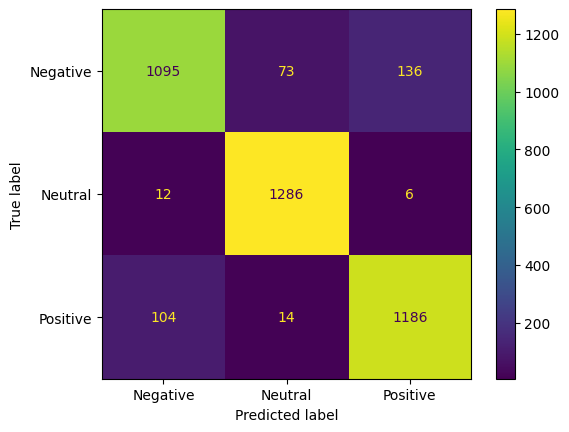

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True, stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11736, 10), (11736,), (3912, 10), (3912,))

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1304
           1       0.93      0.98      0.96      1304
           2       0.87      0.90      0.88      1304

    accuracy                           0.90      3912
   macro avg       0.90      0.90      0.89      3912
weighted avg       0.90      0.90      0.89      3912



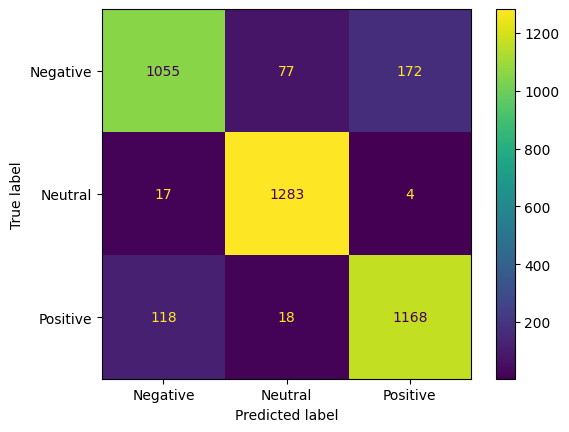

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()

In [ ]:
X = principal_dimensions_Df.iloc[: ,:-1].values
Y = principal_dimensions_Df['label'].values

In [ ]:
X, Y = oversample.fit_resample(X, Y) # Run twice

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True, stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11736, 10), (11736,), (3912, 10), (3912,))

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
estimators = [('rf', RandomForestClassifier()), ('dt', make_pipeline(XGBClassifier()))]

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=GaussianNB())

In [ ]:
clf.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('dt',
                                Pipeline(steps=[('xgbclassifier',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               feature_types=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=...
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...))]))],
                   final_estimator=GaussianNB())

In [ ]:
y_pred = clf.predict(x_test)
#y_pred=np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1304
           1       0.96      0.98      0.97      1304
           2       0.90      0.90      0.90      1304

    accuracy                           0.92      3912
   macro avg       0.91      0.92      0.92      3912
weighted avg       0.91      0.92      0.92      3912



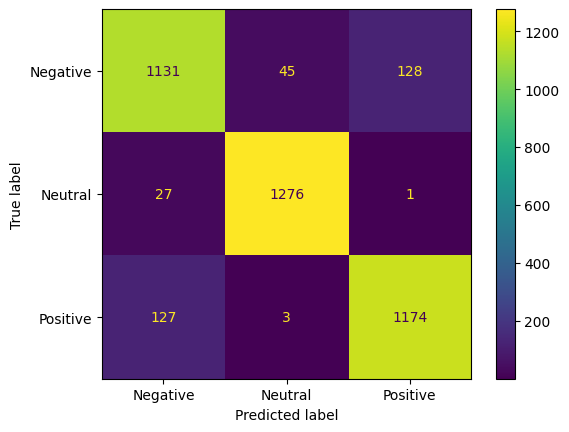

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()

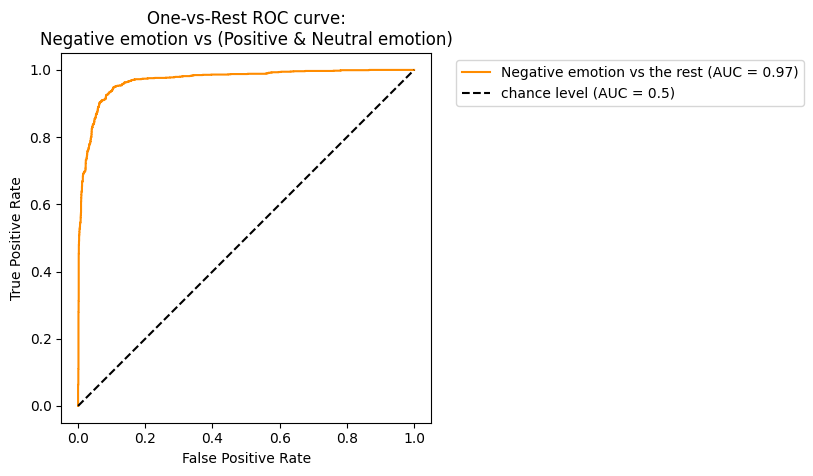

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

from sklearn.metrics import RocCurveDisplay
class_of_interest = 0    # { 'negative':0, 'neutral':1, 'positive':2}
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

y_pred_proba = clf.predict_proba(x_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_proba[:, class_id],
    name="Negative emotion vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curve:\nNegative emotion vs (Positive & Neutral emotion)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

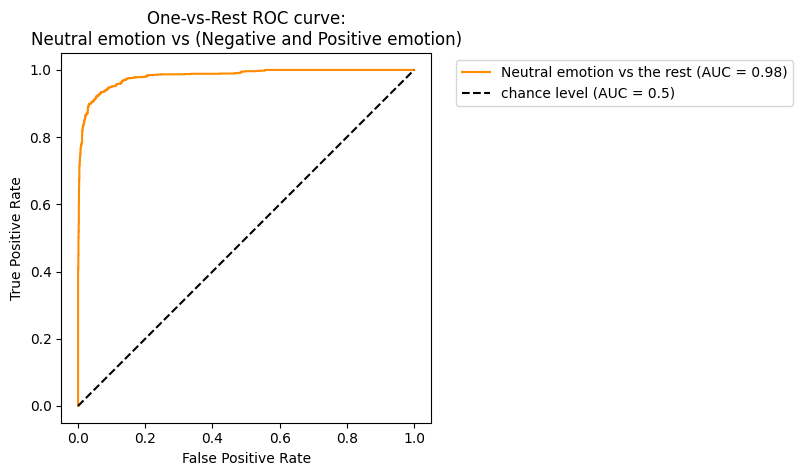

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

from sklearn.metrics import RocCurveDisplay
class_of_interest = 2    # { 'negative':0, 'neutral':1, 'positive':2}
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

y_pred_proba = clf.predict_proba(x_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_proba[:, class_id],
    name="Neutral emotion vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curve:\nNeutral emotion vs (Negative and Positive emotion)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

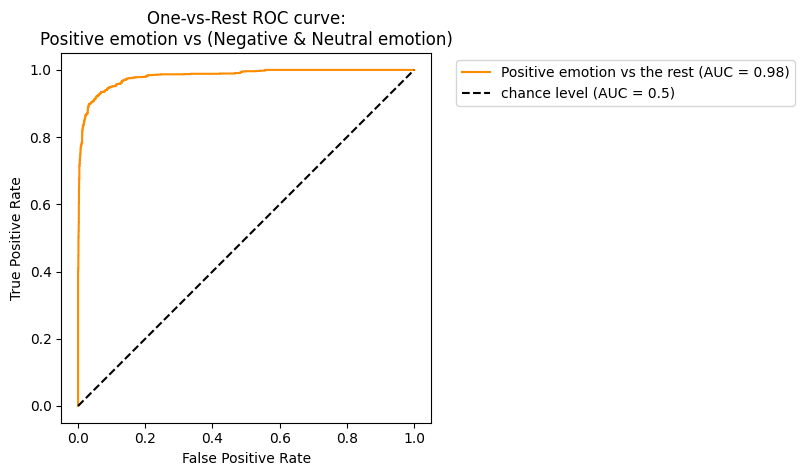

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

from sklearn.metrics import RocCurveDisplay
class_of_interest = 2   # { 'negative':0, 'neutral':1, 'positive':2}
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

y_pred_proba = clf.predict_proba(x_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_proba[:, class_id],
    name="Positive emotion vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curve:\nPositive emotion vs (Negative & Neutral emotion)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True, stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11736, 10), (11736, 3), (3912, 10), (3912, 3))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11736, 10, 1), (11736, 3), (3912, 10, 1), (3912, 3))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 256)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 256)            327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 256)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 128)            163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 128)           0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/30
184/184 [==============================] - 19s 87ms/step - loss: 0.9497 - accuracy: 0.5030 - val_loss: 0.8206 - val_accuracy: 0.5987 - lr: 0.0010
Epoch 2/30
184/184 [==============================] - 15s 81ms/step - loss: 0.7346 - accuracy: 0.6563 - val_loss: 0.6945 - val_accuracy: 0.6736 - lr: 0.0010
Epoch 3/30
184/184 [==============================] - 14s 76ms/step - loss: 0.6506 - accuracy: 0.7115 - val_loss: 0.5786 - val_accuracy: 0.7288 - lr: 0.0010
Epoch 4/30
184/184 [==============================] - 14s 77ms/step - loss: 0.5955 - accuracy: 0.7359 - val_loss: 0.5366 - val_accuracy: 0.7561 - lr: 0.0010
Epoch 5/30
184/184 [==============================] - 15s 80ms/step - loss: 0.5651 - accuracy: 0.7518 - val_loss: 0.5562 - val_accuracy: 0.7543 - lr: 0.0010
Epoch 6/30
184/184 [==============================] - 14s 77ms/step - loss: 0.5391 - accuracy: 0.7613 - val_loss: 0.5060 - val_accuracy: 0.7597 - lr: 0.0010
Epoch 7/30
184/184 [==============================] - 15s 

123/123 [==============================] - 1s 6ms/step - loss: 0.4147 - accuracy: 0.8044
Accuracy of the model on test data :  80.44478297233582 %


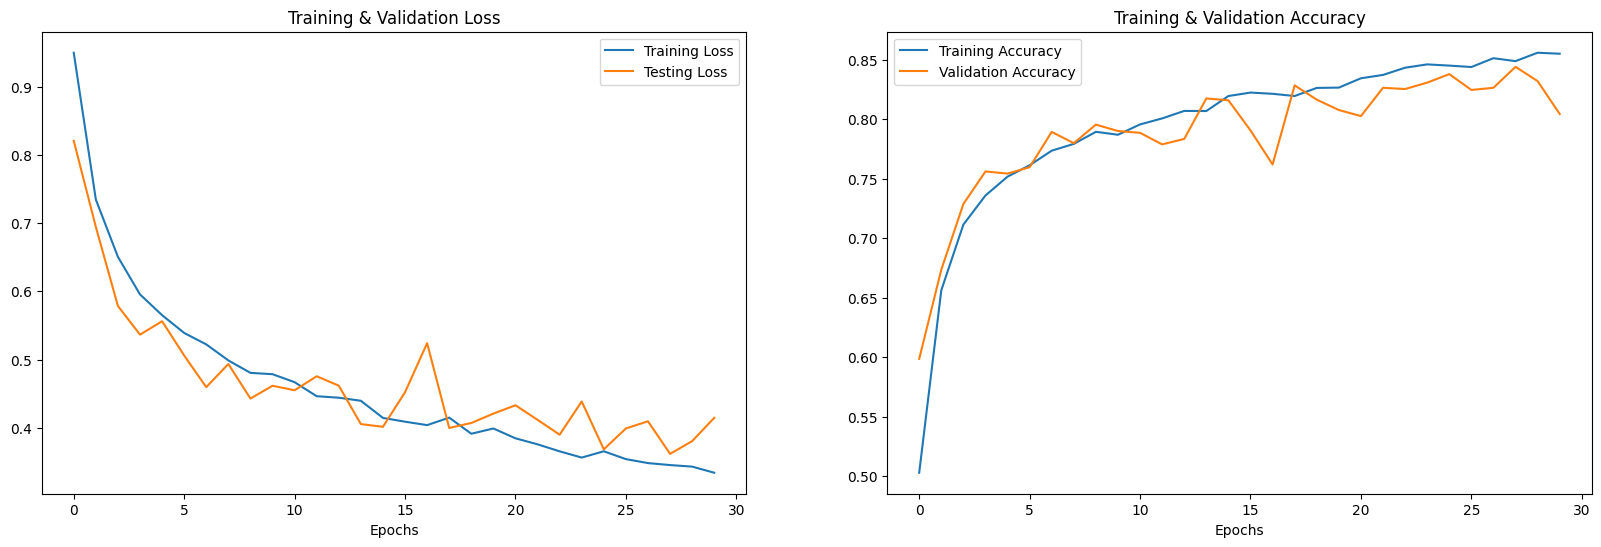

In [ ]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
X = principal_dimensions_Df.iloc[: ,:-1].values
Y = principal_dimensions_Df['label'].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler # Run twice
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train, x_validate, x_test = np.split(X, [int(.7*len(X)), int(.85*len(X))])
y_train, y_validate, y_test = np.split(Y, [int(.7*len(Y)), int(.85*len(Y))])

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_validate = np.expand_dims(x_validate, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print(x_train.shape, y_train.shape, x_validate.shape, y_validate.shape, x_test.shape, y_test.shape)

(10953, 10, 1) (10953, 3) (2347, 10, 1) (2347, 3) (2348, 10, 1) (2348, 3)


In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 256)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 256)            327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 256)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 128)            163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 128)           0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_validate, y_validate), callbacks=[rlrp])

Epoch 1/30
172/172 [==============================] - 14s 72ms/step - loss: 0.9494 - accuracy: 0.5062 - val_loss: 0.7679 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 2/30
172/172 [==============================] - 12s 70ms/step - loss: 0.7558 - accuracy: 0.6298 - val_loss: 0.4457 - val_accuracy: 0.8918 - lr: 0.0010
Epoch 3/30
172/172 [==============================] - 12s 70ms/step - loss: 0.6503 - accuracy: 0.6994 - val_loss: 0.6855 - val_accuracy: 0.6894 - lr: 0.0010
Epoch 4/30
172/172 [==============================] - 12s 70ms/step - loss: 0.6022 - accuracy: 0.7284 - val_loss: 0.6286 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 5/30
172/172 [==============================] - 12s 70ms/step - loss: 0.5652 - accuracy: 0.7433 - val_loss: 0.3872 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 6/30
172/172 [==============================] - 12s 70ms/step - loss: 0.5498 - accuracy: 0.7589 - val_loss: 0.3762 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 7/30
172/172 [==============================] - 12s 

74/74 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.7560
Accuracy of the model on test data :  75.59625506401062 %


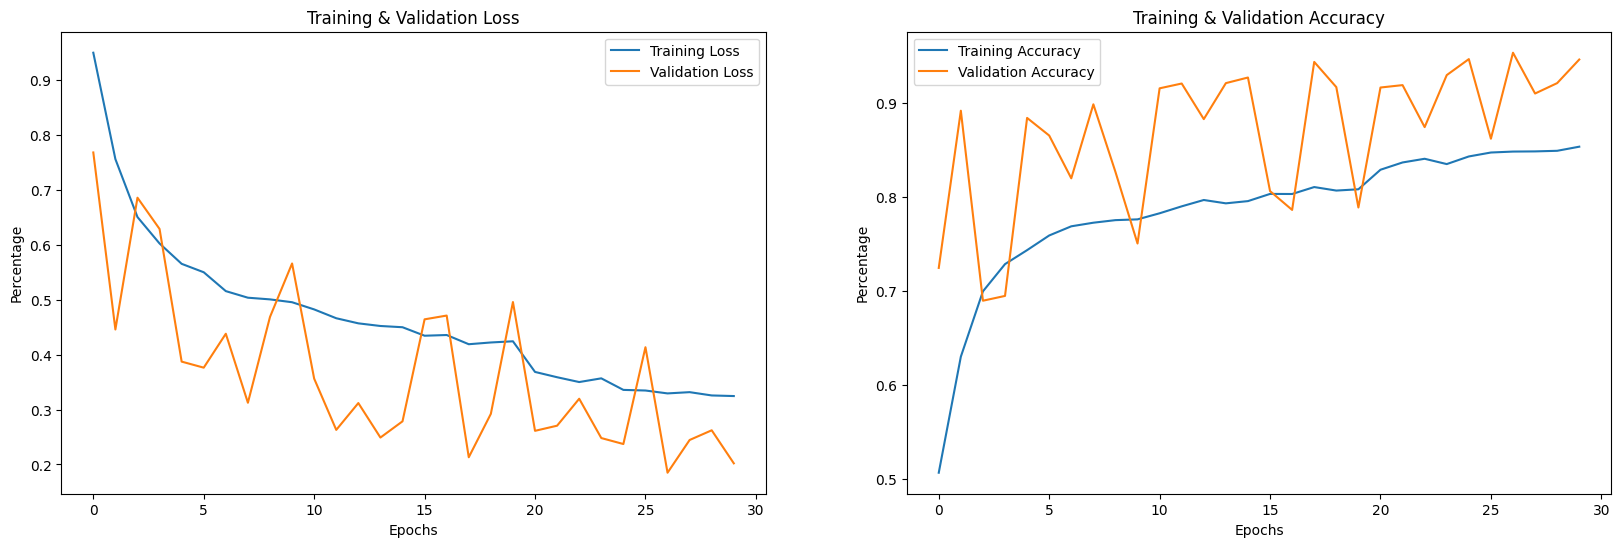

In [ ]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Percentage")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Percentage")
plt.show()

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 10, 256)           1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 256)            327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 3, 256)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 3, 128)            163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_validate, y_validate), callbacks=[rlrp])

Epoch 1/30
86/86 [==============================] - 18s 201ms/step - loss: 0.9686 - accuracy: 0.5060 - val_loss: 0.8137 - val_accuracy: 0.6059 - lr: 0.0010
Epoch 2/30
86/86 [==============================] - 16s 191ms/step - loss: 0.7876 - accuracy: 0.6077 - val_loss: 0.4666 - val_accuracy: 0.8032 - lr: 0.0010
Epoch 3/30
86/86 [==============================] - 11s 132ms/step - loss: 0.6812 - accuracy: 0.6791 - val_loss: 0.4533 - val_accuracy: 0.8189 - lr: 0.0010
Epoch 4/30
86/86 [==============================] - 11s 132ms/step - loss: 0.6342 - accuracy: 0.7063 - val_loss: 0.3797 - val_accuracy: 0.8773 - lr: 0.0010
Epoch 5/30
86/86 [==============================] - 11s 132ms/step - loss: 0.5775 - accuracy: 0.7389 - val_loss: 0.4261 - val_accuracy: 0.8274 - lr: 0.0010
Epoch 6/30
86/86 [==============================] - 11s 132ms/step - loss: 0.5654 - accuracy: 0.7475 - val_loss: 0.5385 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 7/30
86/86 [==============================] - 11s 132ms/st

74/74 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7355
Accuracy of the model on test data :  73.55195879936218 %


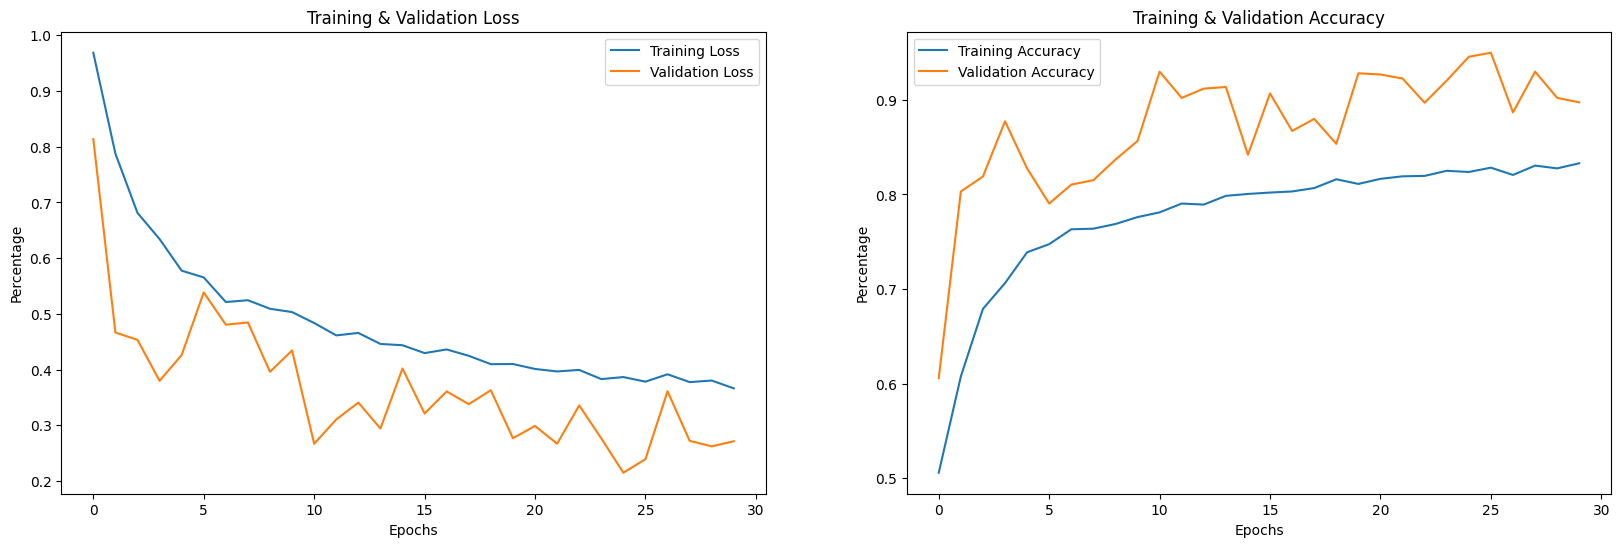

In [ ]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Percentage")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Percentage")
plt.show()

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 10, 256)           1536      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 5, 256)            327936    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 3, 256)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 3, 128)            163968    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 2, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=256, epochs=30, validation_data=(x_validate, y_validate), callbacks=[rlrp])

Epoch 1/30
43/43 [==============================] - 12s 262ms/step - loss: 0.9974 - accuracy: 0.4838 - val_loss: 0.8869 - val_accuracy: 0.5744 - lr: 0.0010
Epoch 2/30
43/43 [==============================] - 11s 253ms/step - loss: 0.8445 - accuracy: 0.5823 - val_loss: 0.7387 - val_accuracy: 0.6583 - lr: 0.0010
Epoch 3/30
43/43 [==============================] - 11s 254ms/step - loss: 0.7027 - accuracy: 0.6676 - val_loss: 0.6117 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 4/30
43/43 [==============================] - 11s 254ms/step - loss: 0.6571 - accuracy: 0.6989 - val_loss: 0.6315 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 5/30
43/43 [==============================] - 10s 241ms/step - loss: 0.6175 - accuracy: 0.7216 - val_loss: 0.7080 - val_accuracy: 0.6660 - lr: 0.0010
Epoch 6/30
43/43 [==============================] - 11s 244ms/step - loss: 0.5723 - accuracy: 0.7398 - val_loss: 0.3649 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 7/30
43/43 [==============================] - 11s 254ms/st

74/74 [==============================] - 0s 5ms/step - loss: 0.5123 - accuracy: 0.7355
Accuracy of the model on test data :  73.55195879936218 %


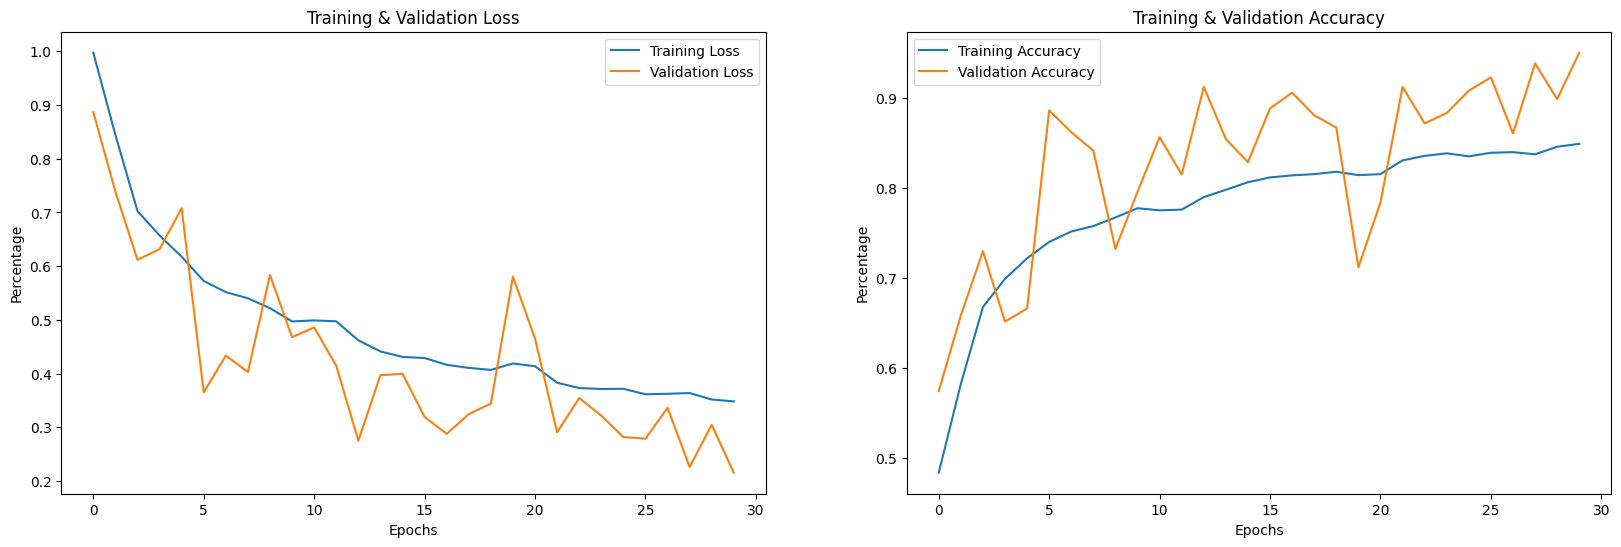

In [ ]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Percentage")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Percentage")
plt.show()

#**CURING METHODOLOGY**

In [ ]:
os.chdir('/content/Curing methodology.csv')

NotADirectoryError: ignored

In [ ]:
data=pd.read_csv("Curing methodology.csv")
data

Emotion  Gender    Age Class
0    Positive    Male  20-50     E
1    Negative  Female  10-20     B
2    Negative    Male  20-50     C
3    Positive  Female  20-50     E
4    Positive    Male  10-20     E
..        ...     ...    ...   ...
100  Positive    Male  20-50     E
101  Negative    Male  44105     A
102   Neutral  Female    50+     D
103  Negative  Female  44105     B
104   Neutral  Female  44105     B

[105 rows x 4 columns]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Emotion']= label_encoder.fit_transform(data['Emotion'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Age']= label_encoder.fit_transform(data['Age'])

In [ ]:
data

Emotion  Gender  Age Class
0          2       1    1     E
1          0       0    0     B
2          0       1    1     C
3          2       0    1     E
4          2       1    0     E
..       ...     ...  ...   ...
100        2       1    1     E
101        0       1    2     A
102        1       0    3     D
103        0       0    2     B
104        1       0    2     B

[105 rows x 4 columns]

In [ ]:
X = data.iloc[: ,:-1].values
Y = data['Class'].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler # Run twice
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((90, 3, 1), (90, 5), (30, 3, 1), (30, 5))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((90, 3), (90, 5), (30, 3), (30, 5))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_66 (Conv1D)          (None, 3, 256)            1536      
                                                                 
 max_pooling1d_66 (MaxPoolin  (None, 2, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_67 (Conv1D)          (None, 2, 128)            163968    
                                                                 
 max_pooling1d_67 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_68 (Conv1D)          (None, 1, 64)           

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.00000001)
history=model.fit(x_train, y_train, batch_size=256, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.6085 - accuracy: 0.2556 - val_loss: 1.5901 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 58ms/step - loss: 1.5983 - accuracy: 0.2556 - val_loss: 1.5748 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 56ms/step - loss: 1.5852 - accuracy: 0.2556 - val_loss: 1.5597 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 55ms/step - loss: 1.5731 - accuracy: 0.2778 - val_loss: 1.5430 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 59ms/step - loss: 1.5551 - accuracy: 0.2889 - val_loss: 1.5260 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 1.5507 - accuracy: 0.2778 - val_loss: 1.5089 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 7/50
1/1 [==============================] - 0s 55ms/step - loss: 1.5404 - accuracy: 

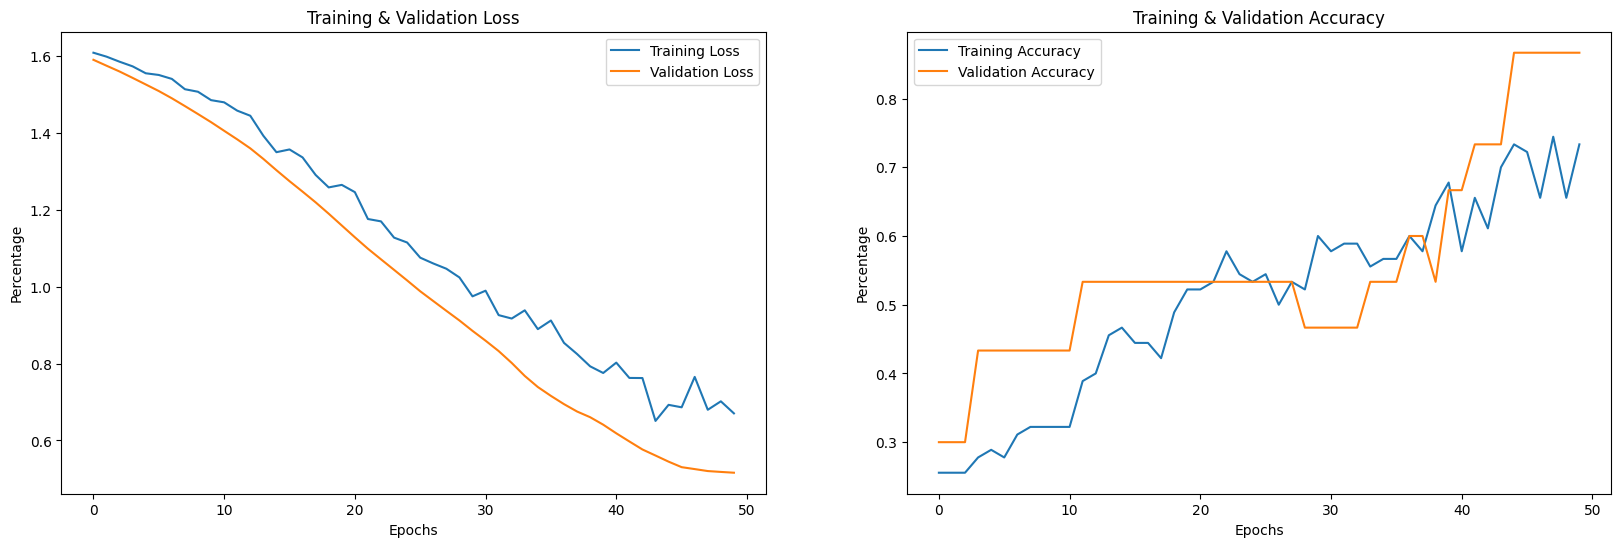

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Percentage")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Percentage")
plt.show()

In [ ]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 21ms/step - loss: 0.5161 - accuracy: 0.8667
Accuracy of the model on test data :  86.66666746139526 %


In [ ]:
from keras.models import load_model
model.save("curing model.h5")

In [ ]:
loaded_model = load_model("curing model.h5")

In [ ]:
predict_y= loaded_model.predict(x_test)
y_pred=np.argmax(predict_y,axis=1)
y_pred

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_84 (Conv1D)          (None, 3, 256)            1536      
                                                                 
 max_pooling1d_84 (MaxPoolin  (None, 2, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_85 (Conv1D)          (None, 2, 128)            163968    
                                                                 
 max_pooling1d_85 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_86 (Conv1D)          (None, 1, 64)           

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.00000001)
history=model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.6090 - accuracy: 0.1778 - val_loss: 1.5878 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 71ms/step - loss: 1.5953 - accuracy: 0.3111 - val_loss: 1.5728 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 70ms/step - loss: 1.5871 - accuracy: 0.2778 - val_loss: 1.5558 - val_accuracy: 0.2333 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 85ms/step - loss: 1.5739 - accuracy: 0.3778 - val_loss: 1.5380 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 73ms/step - loss: 1.5576 - accuracy: 0.2667 - val_loss: 1.5193 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 6/50
1/1 [==============================] - 0s 72ms/step - loss: 1.5615 - accuracy: 0.3556 - val_loss: 1.5004 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 7/50
1/1 [==============================] - 0s 71ms/step - loss: 1.5401 - accuracy: 

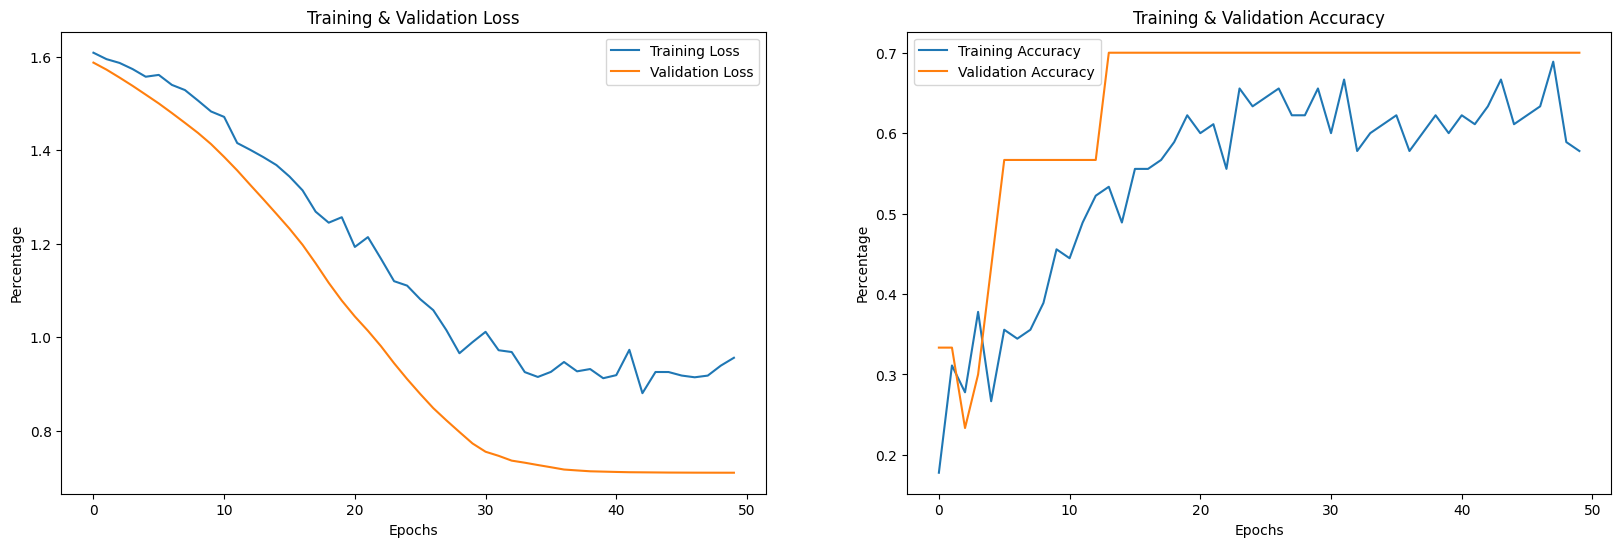

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Percentage")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Percentage")
plt.show()

In [ ]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 29ms/step - loss: 1.1149 - accuracy: 0.8438
Accuracy of the model on test data :  84.375 %


In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_87 (Conv1D)          (None, 3, 256)            1536      
                                                                 
 max_pooling1d_87 (MaxPoolin  (None, 2, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_88 (Conv1D)          (None, 2, 128)            163968    
                                                                 
 max_pooling1d_88 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 dropout_56 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_89 (Conv1D)          (None, 1, 64)           

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.00000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
2/2 [==============================] - 1s 177ms/step - loss: 1.6105 - accuracy: 0.1667 - val_loss: 1.5736 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 0s 50ms/step - loss: 1.5825 - accuracy: 0.3778 - val_loss: 1.5495 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 1.5641 - accuracy: 0.3889 - val_loss: 1.5117 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 1.5383 - accuracy: 0.4111 - val_loss: 1.4715 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 1.5260 - accuracy: 0.3111 - val_loss: 1.4313 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 1.4813 - accuracy: 0.4222 - val_loss: 1.3877 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 1.4296 - accurac

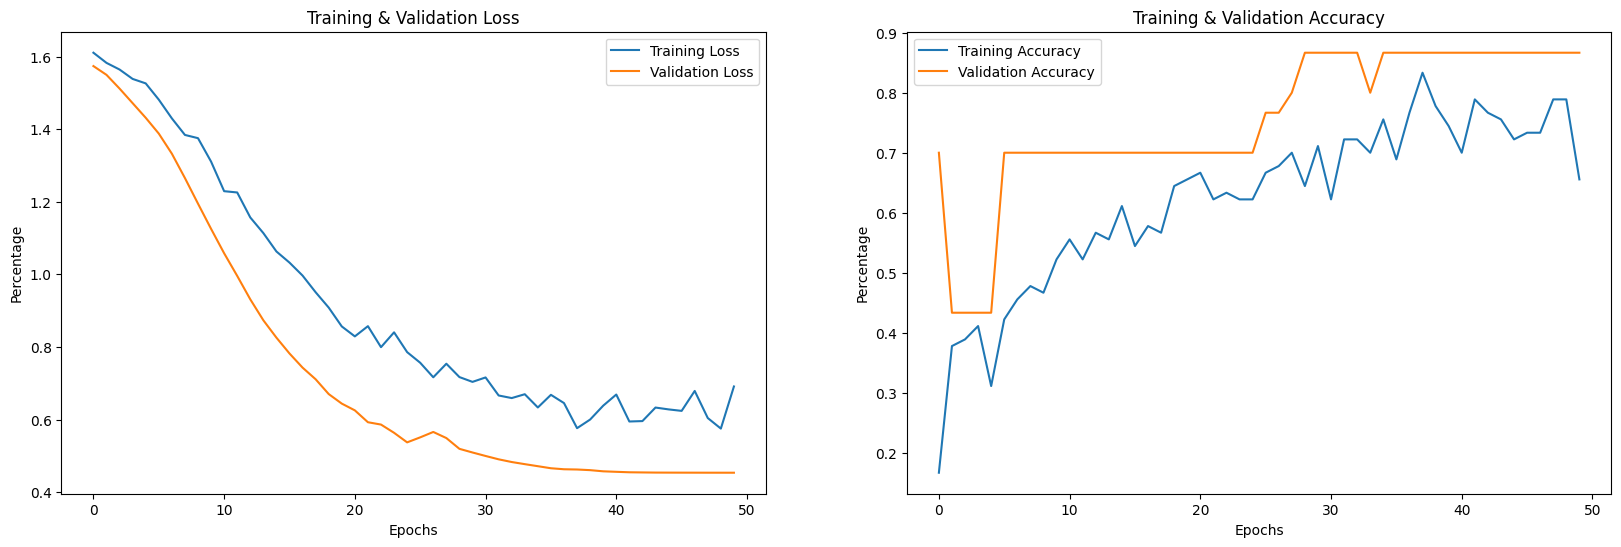

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Percentage")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Percentage")
plt.show()